In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler

In [103]:
linnerud=load_linnerud()

In [104]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [105]:
df1 = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [106]:
df1.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [107]:
df1.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [108]:
df1.shape

(20, 3)

In [109]:
linnerud.target_names

['Weight', 'Waist', 'Pulse']

In [110]:
df2=pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [111]:
df2.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [112]:
df = pd.concat([df1,df2['Pulse']], axis=1)

In [113]:
df.head()

,Chins,Situps,Jumps,Pulse
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0


In [114]:
df.isna().sum()

Chins     0
Situps    0
Jumps     0
Pulse     0
dtype: int64

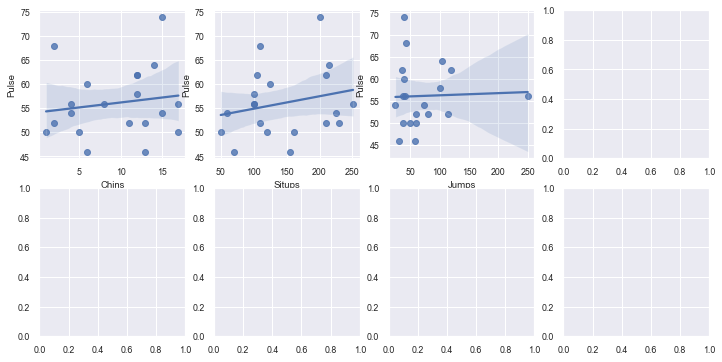

In [115]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(12,6), ncols=4, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps']

# i에는 인덱스가 feature에는 'Chins', 'Situps', 'Jumps'까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/3) # 2행
    col = i%3

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

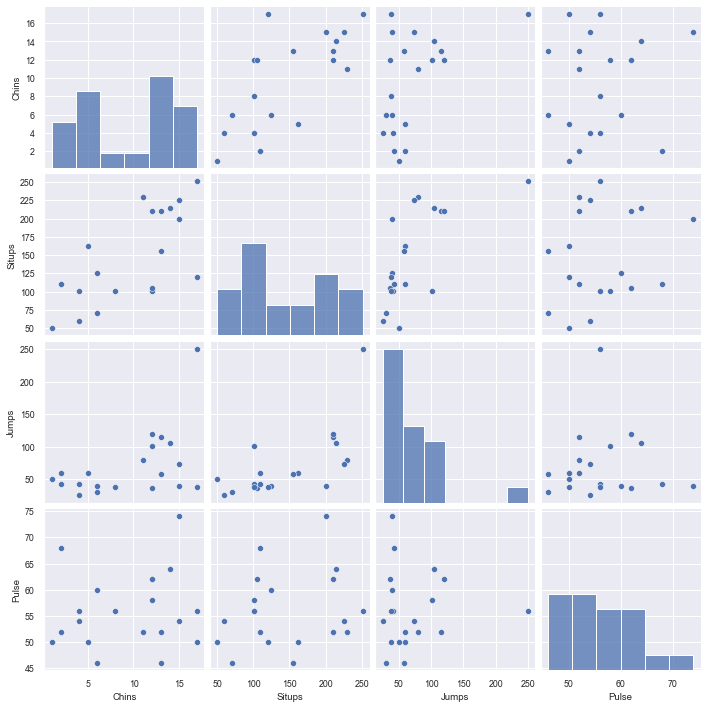

In [116]:
sns.pairplot(df,
             vars=['Chins', 'Situps', 'Jumps', 'Pulse'])
plt.show()

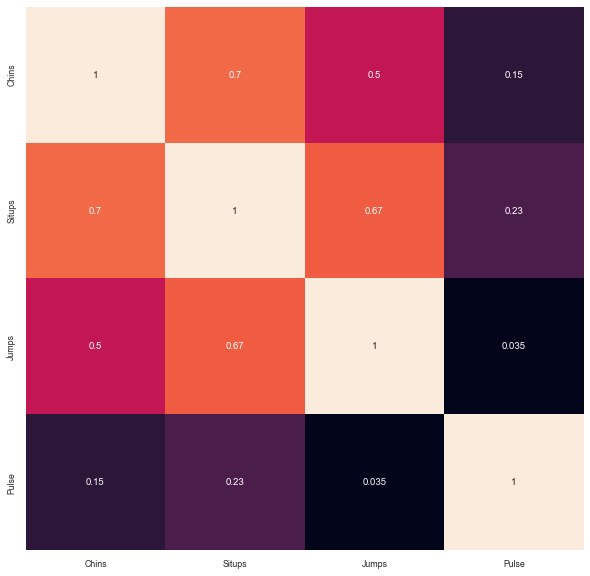

In [117]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
from sklearn.model_selection import train_test_split

x_data=df.drop('Pulse',axis=1)
y_data=df['Pulse']
#x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
#y_data=df.loc[:, 'Pulse']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                 y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [120]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [121]:
y_train.head()

14    46.0
16    54.0
10    50.0
8     74.0
5     56.0
Name: Pulse, dtype: float64

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [123]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 9.9498743710662


In [124]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(random_state=10)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))

0.7307401015228425


In [125]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 9.143708219316713


In [126]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.375


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 9.486832980505138


In [128]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

-0.04787462723226166


In [129]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 7.987111498522163


In [130]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.2, random_state=42)

clf_svm.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

print("SVR score:", clf_svm.score(X_test, y_test))
print("Decision Tree score:", clf_dt.score(X_test, y_test))
print("Random Forest score:", clf_rf.score(X_test, y_test))
print("Linear Regression score:", clf_lr.score(X_test, y_test))

SVR score: -0.21449998389273417
Decision Tree score: -4.2272727272727275
Random Forest score: -1.0217181818181813
Linear Regression score: 0.25


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [132]:
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 10)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Ridge MSE: ", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE: ", mean_squared_error(y_test, y_pred_lasso))

Ridge MSE:  495.16060156067067
Lasso MSE:  232.10893319488406


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e+02, tolerance: 8.778e-02
  model = cd_fast.enet_coordinate_descent(


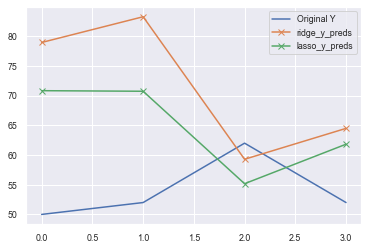

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), y_pred_ridge, '-x', label="ridge_y_preds")
ax.plot(range(len(y_test)), y_pred_lasso, '-x', label="lasso_y_preds")

plt.legend(loc='upper right')
plt.show()